# Neural Networks Sprint Challenge

## 1) Define the following terms:

- Neuron
- Input Layer
- Hidden Layer
- Output Layer
- Activation
- Backpropagation

Neuron:
- a unit that consists of an inputs, weights, biases and an activation function. The neuron takes these inputs and produces a single output which can also be used as an input for another neuron.

Input Layer:
- neurons where inputs are fed from some outside source.

Hidden Layer:
- is between the input layer and the output layers and computes on the weighted inputs that is then used with the activation functions to get the final output.

Output Layer:
- the outputs bases on the result of the network

Activation:
- the value that is output from a neuron

Backpropogation:
- an algorithm to calculate the gradient in neural networks. This is then used to train the NN by modifying the weights for better predictions.

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [29]:
import numpy as np
# np.random.seed(2)

inputs = np.array([[1,1,1],
                   [1,0,1],
                   [0,1,1],
                   [0,0,1]])

correct_outputs = [[1],
                   [0],
                   [0],
                   [0]]

# Initialize weights, all in the range (-1, 1)
weights = 2 * np.random.random((3,1)) - 1
weights

array([[ 0.9660811 ],
       [ 0.54553661],
       [-0.95300072]])

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [31]:
for iteration in range(10000):

    # Calculate weighted sum of inputs and weights
    weighted_sum = np.dot(inputs, weights)

    # Output the activated value for the end of 1 training epoch
    activated_output = sigmoid(weighted_sum)

    # Calculate Error
    error = correct_outputs - activated_output

    # Calculate weight adjustments with sigmoid_derivative
    adjustments = error * sigmoid_derivative(activated_output)

    # Update weights
    weights += np.dot(inputs.T, adjustments)

print('optimized weights after training: ')
print(weights)

print("Output After Training:")
print(activated_output)
print()

optimized weights after training: 
[[ 11.84181884]
 [ 11.84181884]
 [-18.05103753]]
Output After Training:
[[9.96433152e-01]
 [2.00697368e-03]
 [2.00697368e-03]
 [1.44765391e-08]]



In [32]:
activated_output.round(0).astype(int)

array([[1],
       [0],
       [0],
       [0]])

## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [35]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'

df = pd.read_csv(url, header=0)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [43]:
X = df.drop('target', axis=1)
y = df['target']

X.shape, y.shape

((303, 13), (303,))

In [45]:
# Scale
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.reshape(-1,13)
y = np.array(y).reshape(-1,1)

X.shape, y.shape


((303, 13), (303, 1))

In [0]:
# class Neural_Network(object):
#   def __init__(self):
#     self.inputs = 13 # features
#     self.hiddenNodes = 30
#     self.outputNodes = 1
    
#     # Initlize Weights
#     self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) # (13x7)
#     self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes) # (7x1)

In [0]:
class Neural_Network(object):
  def __init__(self):
    self.inputs = 13
    self.hiddenNodes = 7
    self.outputNodes = 1

    # Initialize Weights:
    self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) 
    self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes) 

  def feed_forward(self, X):
    
    # Weighted sum between inputs and hidden layer:
    self.hidden_sum = np.dot(X, self.L1_weights)
    
    # Activations of weighted sum:
    self.activated_hidden = self.sigmoid(self.hidden_sum)
    
    # Weighted sum between hidden and output:
    self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
    
    # final activation of output:
    self.activated_output = self.sigmoid(self.output_sum)
    
    return self.activated_output
    
  def sigmoid(self, s):
    return 1/(1+np.exp(-s))
  
  #sigmoid derivative  
  def sigmoidPrime(self, s):
    return s * (1 - s)
  
 #dCost/dWeights =    
    
  def backward(self, X, y, output):
    # backward propgate through the network
    
    # error in output:
    self.output_error = y - output 
    
    # applying derivative of sigmoid to error:
    self.output_delta = self.output_error * self.sigmoidPrime(output) 
    
    # z2 error: how much our hidden layer weights contributed to output error:
    self.z2_error = self.output_delta.dot(self.L2_weights.T)
    
    # applying derivative of sigmoid to z2 error:
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden) 
    
    # adjusting first set (input --> hidden) weights:
    self.L1_weights += X.T.dot(self.z2_delta) 
    
    # adjusting second set (hidden --> output) weights:
    self.L2_weights += self.activated_hidden.T.dot(self.output_delta) 
    
  def train (self, X, y):
    output = self.feed_forward(X)
    self.backward(X, y, output)

In [62]:
NN = Neural_Network()
for i in range(1000): # trains the NN 1,000 times
  if i+1 in [1,2,3,4,5] or (i+1) % 50 == 0:
    print('+---------- EPOCH', i+1, '-----------+')
#     print("Input: \n", X) 
#     print("Actual Output: \n", y)  
#     print("Predicted Output: \n" + str(NN.feed_forward(X))) 
    print("Loss: \n" + str(np.mean(np.square(y - NN.feed_forward(X))))) # mean sum squared loss
    print("\n")
  NN.train(X, y)

+---------- EPOCH 1 -----------+
Loss: 
0.2954298455216771


+---------- EPOCH 2 -----------+
Loss: 
0.5446161464787274


+---------- EPOCH 3 -----------+
Loss: 
0.5445341285590304


+---------- EPOCH 4 -----------+
Loss: 
0.5444804090719524


+---------- EPOCH 5 -----------+
Loss: 
0.5444405797101428


+---------- EPOCH 50 -----------+
Loss: 
0.11317435286719119


+---------- EPOCH 100 -----------+
Loss: 
0.0474918896143357


+---------- EPOCH 150 -----------+
Loss: 
0.04126757217912086


+---------- EPOCH 200 -----------+
Loss: 
0.04109371756544736


+---------- EPOCH 250 -----------+
Loss: 
0.04098749289134192


+---------- EPOCH 300 -----------+
Loss: 
0.04092133518607475


+---------- EPOCH 350 -----------+
Loss: 
0.040879468525049034


+---------- EPOCH 400 -----------+
Loss: 
0.04084978419685774


+---------- EPOCH 450 -----------+
Loss: 
0.04082521858679262


+---------- EPOCH 500 -----------+
Loss: 
0.04079129839029656


+---------- EPOCH 550 -----------+
Loss: 
0.038222361451

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


np.random.seed(42)



In [0]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

In [77]:
history = model.fit(X, y, epochs=150)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
303/303 [==============================] - 1s 2ms/step - loss: 0.8034 - acc: 0.4125
Epoch 2/150
303/303 [==============================] - 0s 73us/step - loss: 0.7558 - acc: 0.4686
Epoch 3/150
303/303 [==============================] - 0s 78us/step - loss: 0.7143 - acc: 0.5380
Epoch 4/150
303/303 [==============================] - 0s 65us/step - loss: 0.6769 - acc: 0.5974
Epoch 5/150
303/303 [==============================] - 0s 81us/step - loss: 0.6447 - acc: 0.6469
Epoch 6/150
303/303 [==============================] - 0s 59us/step - loss: 0.6165 - acc: 0.6898
Epoch 7/150
303/303 [==============================] - 0s 62us/step - loss: 0.5898 - acc: 0.7030
Epoch 8/150
303/303 [==============================] - 0s 67us/step - loss: 0.5671 - acc: 0.7195
Epoch 9/150
303/303 [==============================] - 0s 58us/step - loss: 0.5455 - acc: 0.7459
Epoch 10/150
303/303 [==============================] - 0s 71us/step - loss: 0.5

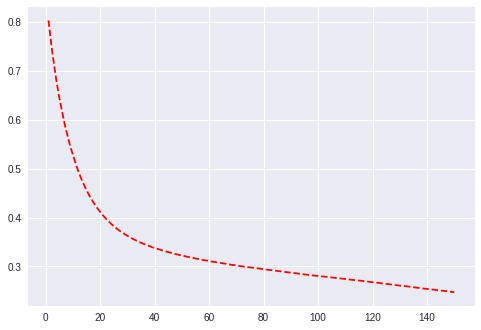

In [79]:
# Evaluate Model
import matplotlib.pyplot as plt
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.show();

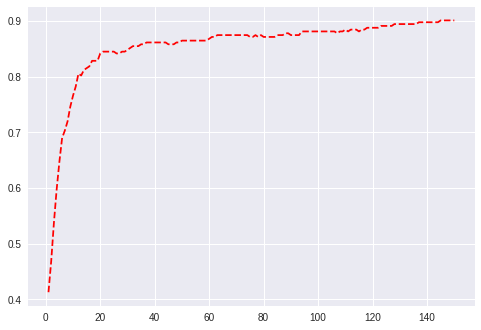

In [80]:
training_accuracy = history.history['acc']
epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.show();

In [81]:
# define the grid search parameters
param_grid = {'batch_size': [60, 80],
              'epochs': [20, 40, 60, 80]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
202/202 [==============================] - 0s 1ms/step - loss: 0.6219 - acc: 0.6832
Epoch 2/20
202/202 [==============================] - 0s 47us/step - loss: 0.6130 - acc: 0.6931
Epoch 3/20
202/202 [==============================] - 0s 38us/step - loss: 0.6045 - acc: 0.6980
Epoch 4/20
202/202 [==============================] - 0s 41us/step - loss: 0.5955 - acc: 0.7178
Epoch 5/20
202/202 [==============================] - 0s 42us/step - loss: 0.5868 - acc: 0.7228
Epoch 6/20
202/202 [==============================] - 0s 49us/step - loss: 0.5781 - acc: 0.7277
Epoch 7/20
202/202 [==============================] - 0s 39us/step - loss: 0.5695 - acc: 0.7327
Epoch 8/20
202/202 [==============================] - 0s 34us/step - loss: 0.5612 - acc: 0.7426
Epoch 9/20
202/202 [==============================] - 0s 38us/step - loss: 0.5528 - acc: 0.7426
Epoch 10/20
202/202 [==============================] - 0s 47us/step - loss: 0.5448 - acc: 0.7426
Epoch 11/20
202/202 [===================

In [83]:
%%time

# define the grid search parameters
param_grid = {'batch_size': [20, 40, 60, 80],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
202/202 [==============================] - 2s 8ms/step - loss: 0.7284 - acc: 0.5495
Epoch 2/20
202/202 [==============================] - 0s 97us/step - loss: 0.6904 - acc: 0.6089
Epoch 3/20
202/202 [==============================] - 0s 90us/step - loss: 0.6571 - acc: 0.6436
Epoch 4/20
202/202 [==============================] - 0s 94us/step - loss: 0.6279 - acc: 0.6535
Epoch 5/20
202/202 [==============================] - 0s 81us/step - loss: 0.6033 - acc: 0.6980
Epoch 6/20
202/202 [==============================] - 0s 89us/step - loss: 0.5809 - acc: 0.7030
Epoch 7/20
202/202 [==============================] - 0s 85us/step - loss: 0.5616 - acc: 0.7228
Epoch 8/20
202/202 [==============================] - 0s 88us/step - loss: 0.5436 - acc: 0.7624
Epoch 9/20
202/202 [==============================] - 0s 88us/step - loss: 0.5271 - acc: 0.7574
Epoch 10/20
202/202 [==============================] - 0s 93us/step - loss: 0.5118 - acc: 0.7723
Epoch 11/20
202/202 [===================

In [85]:
%%time
# Gridsearch on activation

# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid',
              'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, activation=activation))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=40, verbose=1)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
202/202 [==============================] - 2s 11ms/step - loss: 0.6989 - acc: 0.4356
Epoch 2/20
202/202 [==============================] - 0s 73us/step - loss: 0.6951 - acc: 0.4703
Epoch 3/20
202/202 [==============================] - 0s 63us/step - loss: 0.6916 - acc: 0.5396
Epoch 4/20
202/202 [==============================] - 0s 78us/step - loss: 0.6883 - acc: 0.5842
Epoch 5/20
202/202 [==============================] - 0s 68us/step - loss: 0.6850 - acc: 0.6287
Epoch 6/20
202/202 [==============================] - 0s 70us/step - loss: 0.6818 - acc: 0.6634
Epoch 7/20
202/202 [==============================] - 0s 67us/step - loss: 0.6787 - acc: 0.6683
Epoch 8/20
202/202 [==============================] - 0s 68us/step - loss: 0.6758 - acc: 0.6980
Epoch 9/20
202/202 [==============================] - 0s 68us/step - loss: 0.6731 - acc: 0.7129
Epoch 10/20
202/202 [==============================] - 0s 65us/step - loss: 0.6703 - acc: 0.7178
Epoch 11/20
202/202 [==================

In [87]:
# Momentum
from keras.optimizers import SGD

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
  # create model
  model = Sequential()
  model.add(Dense(13, input_dim=13, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = SGD(lr=learn_rate, momentum=momentum)
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=60, verbose=1)

# Create param grid
learn_rate = [0.01]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
202/202 [==============================] - 4s 18ms/step - loss: 0.6965 - acc: 0.4901
Epoch 2/20
202/202 [==============================] - 0s 64us/step - loss: 0.6952 - acc: 0.4950
Epoch 3/20
202/202 [==============================] - 0s 54us/step - loss: 0.6940 - acc: 0.5000
Epoch 4/20
202/202 [==============================] - 0s 51us/step - loss: 0.6927 - acc: 0.5099
Epoch 5/20
202/202 [==============================] - 0s 60us/step - loss: 0.6914 - acc: 0.5198
Epoch 6/20
202/202 [==============================] - 0s 61us/step - loss: 0.6903 - acc: 0.5248
Epoch 7/20
202/202 [==============================] - 0s 51us/step - loss: 0.6891 - acc: 0.5347
Epoch 8/20
202/202 [==============================] - 0s 65us/step - loss: 0.6880 - acc: 0.5396
Epoch 9/20
202/202 [==============================] - 0s 60us/step - loss: 0.6869 - acc: 0.5495
Epoch 10/20
202/202 [==============================] - 0s 62us/step - loss: 0.6858 - acc: 0.5545
Epoch 11/20
202/202 [==================